In [18]:
# Imports
import pandas as pd
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [19]:
# Load datasets


# Load news dataset
dataset = "MINDsmall_dev" #MINDlarge_train #MINDsmall_train
path = r'C:\Users\jfast\Documents\Justine\03_Studium\Master\Semester_3_Ausland\CompTools\Project\Datasets'
news_path = path + "\\" + dataset +'\\news.tsv'
news_df = pd.read_csv(news_path, sep='\t', 
                         names=['news_id', 'category', 'subcategory', 'title', 
                               'abstract', 'url', 'title_entities', 'abstract_entities'])

# Load news.tsv
news_df = pd.read_csv(news_path, sep='\t', 
                      names=['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])

# Create a dictionary mapping 'news_id' to 'title'
news_title_dict = dict(zip(news_df['news_id'], news_df['title']))


# Load behavior dataset
behaviors_path = path + "\\" + dataset + '\\behaviors.tsv'
behaviors_df = pd.read_csv(behaviors_path, sep='\t', 
                         names=['impression_id', 'user_id', 'time', 'history', 
                               'impressions'])

# Cut the U in front of the user id for only integer
# behaviors_df["user_id"] = behaviors_df["user_id"].str.lstrip('U')
# Get rid of NaNs
# behaviors_df = behaviors_df.dropna(subset=['history'])
behaviors_df['history'] = behaviors_df['history'].fillna('')

# Group by user and get rid of duplicates in the history
user_histories = []
for user_id, user_data in behaviors_df.groupby('user_id'):
    one_history_string = " ".join(user_data['history'])
    splitted_without_duplicates = set(one_history_string.split())
    articles_list_per_user = list(splitted_without_duplicates)
    user_histories.append(articles_list_per_user)
user_histories

[['N23571',
  'N13374',
  'N52301',
  'N32607',
  'N62058',
  'N40207',
  'N58267',
  'N25682',
  'N10646',
  'N24356',
  'N596',
  'N57737'],
 ['N57967', 'N9803', 'N64777', 'N9120', 'N36699', 'N2945', 'N27612'],
 ['N58641',
  'N60516',
  'N19434',
  'N8572',
  'N63324',
  'N63709',
  'N43843',
  'N22719',
  'N10059',
  'N50049',
  'N25933',
  'N53234',
  'N64273',
  'N47847',
  'N18094',
  'N47348',
  'N47173',
  'N42620',
  'N48076',
  'N40716',
  'N2479',
  'N48998',
  'N56753',
  'N11037',
  'N8549',
  'N35560',
  'N46978',
  'N62058',
  'N3345',
  'N9653',
  'N2231',
  'N52536',
  'N20575',
  'N9155',
  'N7422',
  'N32748'],
 ['N54936',
  'N58641',
  'N27940',
  'N4607',
  'N28467',
  'N54300',
  'N24591',
  'N49475',
  'N1064',
  'N8448',
  'N32194',
  'N46987',
  'N13374',
  'N57886',
  'N29841',
  'N38332',
  'N31891',
  'N60029',
  'N63053',
  'N52307',
  'N7171',
  'N28257',
  'N48098',
  'N64955',
  'N19594',
  'N54225',
  'N39235',
  'N63889',
  'N1998',
  'N29227',
  'N253

# A-Priori

In [20]:
# Pass 1
# Store count of each individual item
articles_count = {}

for history in user_histories:
    for article in history:
        if article in articles_count:
            articles_count[article] += 1
        else:
            articles_count[article] = 1
print(articles_count)

{'N23571': 524, 'N13374': 1369, 'N52301': 95, 'N32607': 77, 'N62058': 2024, 'N40207': 491, 'N58267': 56, 'N25682': 51, 'N10646': 157, 'N24356': 887, 'N596': 87, 'N57737': 1294, 'N57967': 567, 'N9803': 1458, 'N64777': 536, 'N9120': 1098, 'N36699': 845, 'N2945': 208, 'N27612': 577, 'N58641': 1658, 'N60516': 41, 'N19434': 262, 'N8572': 112, 'N63324': 56, 'N63709': 284, 'N43843': 186, 'N22719': 87, 'N10059': 1695, 'N50049': 63, 'N25933': 15, 'N53234': 861, 'N64273': 1909, 'N47847': 293, 'N18094': 909, 'N47348': 221, 'N47173': 356, 'N42620': 5628, 'N48076': 647, 'N40716': 1788, 'N2479': 14, 'N48998': 198, 'N56753': 1099, 'N11037': 88, 'N8549': 674, 'N35560': 433, 'N46978': 755, 'N3345': 408, 'N9653': 740, 'N2231': 356, 'N52536': 1025, 'N20575': 1388, 'N9155': 219, 'N7422': 520, 'N32748': 287, 'N54936': 441, 'N27940': 37, 'N4607': 3572, 'N28467': 330, 'N54300': 343, 'N24591': 966, 'N49475': 897, 'N1064': 72, 'N8448': 2105, 'N32194': 153, 'N46987': 374, 'N57886': 846, 'N29841': 33, 'N38332': 

In [21]:
# Find frequent items
frequent_articles_apriori = {}

threshold = 500 #50.000 histories -> 1% ist 500

for article, count in articles_count.items():
    if count >= threshold:
        frequent_articles_apriori[article] = count

frequent_articles_apriori

{'N23571': 524,
 'N13374': 1369,
 'N62058': 2024,
 'N24356': 887,
 'N57737': 1294,
 'N57967': 567,
 'N9803': 1458,
 'N64777': 536,
 'N9120': 1098,
 'N36699': 845,
 'N27612': 577,
 'N58641': 1658,
 'N10059': 1695,
 'N53234': 861,
 'N64273': 1909,
 'N18094': 909,
 'N42620': 5628,
 'N48076': 647,
 'N40716': 1788,
 'N56753': 1099,
 'N8549': 674,
 'N46978': 755,
 'N9653': 740,
 'N52536': 1025,
 'N20575': 1388,
 'N7422': 520,
 'N4607': 3572,
 'N24591': 966,
 'N49475': 897,
 'N8448': 2105,
 'N57886': 846,
 'N28257': 1615,
 'N19594': 546,
 'N54225': 1754,
 'N39235': 1570,
 'N14452': 618,
 'N11101': 1320,
 'N37915': 773,
 'N306': 5659,
 'N17966': 599,
 'N27448': 2560,
 'N10865': 1243,
 'N29510': 546,
 'N90': 946,
 'N32004': 2323,
 'N56121': 748,
 'N10470': 1091,
 'N2735': 973,
 'N22260': 828,
 'N16715': 3440,
 'N33276': 2172,
 'N59704': 2699,
 'N38701': 850,
 'N37920': 1281,
 'N39117': 1058,
 'N37942': 1063,
 'N18030': 790,
 'N61196': 954,
 'N61319': 899,
 'N12907': 1659,
 'N33096': 2348,
 'N56

In [22]:
articles_all = list(news_df['news_id'])

In [23]:
# Before Pass 2
# Create new array

frequent_singleton_table_apriori = {}
map_value = 1

for article in articles_all:
    if article in frequent_articles_apriori:
        frequent_singleton_table_apriori[article] = map_value
        map_value += 1
    else:
        frequent_singleton_table_apriori[article] = 0

frequent_singleton_table_apriori

{'N55528': 0,
 'N18955': 0,
 'N61837': 0,
 'N53526': 0,
 'N38324': 0,
 'N2073': 0,
 'N11429': 0,
 'N49186': 0,
 'N2131': 0,
 'N59295': 0,
 'N24510': 0,
 'N59883': 0,
 'N9721': 0,
 'N60905': 0,
 'N16587': 0,
 'N28361': 0,
 'N18680': 0,
 'N55610': 0,
 'N35621': 0,
 'N22850': 0,
 'N58173': 0,
 'N29120': 0,
 'N9786': 0,
 'N46481': 0,
 'N47705': 0,
 'N1834': 0,
 'N3574': 0,
 'N42474': 0,
 'N64498': 0,
 'N59538': 0,
 'N7517': 0,
 'N63665': 0,
 'N26094': 0,
 'N59469': 0,
 'N11649': 0,
 'N15926': 0,
 'N43620': 0,
 'N60603': 0,
 'N40078': 0,
 'N61409': 0,
 'N22486': 0,
 'N46013': 0,
 'N50643': 0,
 'N60723': 0,
 'N63175': 0,
 'N282': 0,
 'N33434': 0,
 'N8795': 0,
 'N43647': 0,
 'N40690': 0,
 'N41835': 0,
 'N8071': 0,
 'N49265': 0,
 'N5124': 0,
 'N42777': 0,
 'N41387': 0,
 'N41106': 0,
 'N37243': 0,
 'N20139': 0,
 'N9680': 0,
 'N35518': 0,
 'N60434': 0,
 'N48239': 0,
 'N49389': 0,
 'N40045': 0,
 'N43946': 0,
 'N14555': 0,
 'N10836': 0,
 'N24798': 0,
 'N64668': 0,
 'N27435': 0,
 'N30756': 0,
 'N33

In [24]:
count_apriori = 0
for count in frequent_singleton_table_apriori.values():
    if count >= 1:
        count_apriori += 1
count_apriori

415

In [25]:
# Pass 2
# Store pairs of items (articles) that are both frequent (in frequent_articles)

pairs_of_frequent_articles_apriori = {}

for history in user_histories:
    frequent_items_apriori = []
    for article in history:
        if article in frequent_singleton_table_apriori and frequent_singleton_table_apriori[article] > 0:
            frequent_items_apriori.append(article)

    len_freq_items = len(frequent_items_apriori)
    for i in range(len_freq_items):
        for j in range(i + 1, len_freq_items):
            article1, article2 = sorted((frequent_items_apriori[i], frequent_items_apriori[j]))
            pair = (article1, article2)

            if pair in pairs_of_frequent_articles_apriori:
                pairs_of_frequent_articles_apriori[pair] += 1
            else:
                pairs_of_frequent_articles_apriori[pair] = 1

min_support = 500
frequent_pairs_apriori = {}
for pair, count in pairs_of_frequent_articles_apriori.items():
    if count >= min_support:
        frequent_pairs_apriori[pair] = count
frequent_pairs_apriori

{('N306', 'N4607'): 725,
 ('N32004', 'N4607'): 514,
 ('N4607', 'N59704'): 522,
 ('N45794', 'N4607'): 623,
 ('N306', 'N32004'): 559,
 ('N16715', 'N306'): 669,
 ('N306', 'N59704'): 638,
 ('N306', 'N33096'): 623,
 ('N306', 'N45794'): 942,
 ('N306', 'N55743'): 595,
 ('N306', 'N31801'): 909,
 ('N306', 'N54827'): 542,
 ('N16715', 'N45794'): 614,
 ('N16715', 'N31801'): 796,
 ('N45794', 'N59704'): 785,
 ('N31801', 'N45794'): 721,
 ('N45794', 'N54827'): 526,
 ('N4607', 'N871'): 615,
 ('N306', 'N43142'): 976,
 ('N33096', 'N43142'): 544,
 ('N42620', 'N59704'): 535,
 ('N51706', 'N59704'): 519,
 ('N306', 'N5978'): 544,
 ('N42620', 'N5978'): 523,
 ('N306', 'N42620'): 1157,
 ('N306', 'N51706'): 713,
 ('N42620', 'N51706'): 630,
 ('N4607', 'N55189'): 578,
 ('N51706', 'N55189'): 513,
 ('N51706', 'N871'): 673,
 ('N46392', 'N59704'): 581,
 ('N59704', 'N871'): 549,
 ('N33096', 'N46392'): 524,
 ('N46392', 'N871'): 645,
 ('N31801', 'N55189'): 531,
 ('N55189', 'N871'): 645,
 ('N31801', 'N871'): 585,
 ('N16233

In [26]:
len(frequent_pairs_apriori)

93

In [27]:
pairs_list_apriori = list(frequent_pairs_apriori.items())
sorted_pairs_apriori = sorted(pairs_list_apriori, key=lambda x: x[1], reverse=True)
top_10_apriori = sorted_pairs_apriori[:10]

print("Top 10 Pairs - A-Priori:")
for pair, count in top_10_apriori:
    print(pair, count)

Top 10 Pairs - A-Priori:
('N306', 'N42620') 1157
('N306', 'N871') 1025
('N306', 'N43142') 976
('N306', 'N45794') 942
('N306', 'N31801') 909
('N45794', 'N46392') 862
('N42620', 'N43142') 845
('N306', 'N46392') 834
('N42620', 'N45794') 831
('N42620', 'N55189') 831


In [28]:
for pair, count in top_10_apriori:
    article1_id, article2_id = pair

    title1 = news_df.loc[news_df['news_id'] == article1_id, 'title'].values[0]
    title2 = news_df.loc[news_df['news_id'] == article2_id, 'title'].values[0]
    
    print(article1_id, "(" , title1, ") \n", article2_id, "(", title2, ") \n Count: ", count)
    print("\n")

N306 ( Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies ) 
 N42620 ( Heidi Klum's 2019 Halloween Costume Transformation Is Mind-Blowing   But, Like, What Is It? ) 
 Count:  1157


N306 ( Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies ) 
 N871 ( Woman, suspect dead at 'Tarzan' actor Ron Ely's California residence ) 
 Count:  1025


N306 ( Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies ) 
 N43142 ( Former NBA first-round pick Jim Farmer arrested in sex sting operation ) 
 Count:  976


N306 ( Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies ) 
 N45794 ( Four flight attendants were arrested in Miami's airport after bringing in thousands in cash, police say ) 
 Count:  942


N306 ( Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies ) 
 N31801 ( Joe Biden reportedly denied Communion at a South Carolina church because of his stance on abortion ) 
 Count:  909


N45794 ( Four f

In [29]:
# Set of 3 articles

triplets_of_frequent_articles = {}
frequent_triplets = {}

for history in user_histories:
    frequent_items_apriori = []
    for article in history:
        if frequent_singleton_table_apriori.get(article, 0) > 0:
            frequent_items_apriori.append(article)

    len_freq_items = len(frequent_items_apriori)
    for i in range(len_freq_items):
        for j in range(i + 1, len_freq_items):
            for k in range(j + 1, len_freq_items):
                article1, article2, article3 = sorted((frequent_items_apriori[i], frequent_items_apriori[j], frequent_items_apriori[k]))
                triplet = (article1, article2, article3)

                if article1 in frequent_singleton_table_apriori and article2 in frequent_singleton_table_apriori and article3 in frequent_singleton_table_apriori:
                    if triplet in triplets_of_frequent_articles:
                        triplets_of_frequent_articles[triplet] += 1
                    else:
                        triplets_of_frequent_articles[triplet] = 1

min_support = 200
for triplet, count in triplets_of_frequent_articles.items():
    if count >= min_support:
        frequent_triplets[triplet] = count

frequent_triplets

{('N16715', 'N306', 'N31801'): 224,
 ('N306', 'N45794', 'N59704'): 227,
 ('N306', 'N31801', 'N45794'): 230,
 ('N16715', 'N31801', 'N45794'): 203,
 ('N306', 'N42620', 'N51706'): 202,
 ('N306', 'N42620', 'N4607'): 231,
 ('N306', 'N4607', 'N871'): 222,
 ('N306', 'N42620', 'N43142'): 271,
 ('N306', 'N43142', 'N51706'): 238,
 ('N306', 'N43142', 'N45794'): 245,
 ('N306', 'N31801', 'N43142'): 237,
 ('N306', 'N43142', 'N871'): 263,
 ('N42620', 'N43142', 'N51706'): 202,
 ('N42620', 'N43142', 'N45794'): 203,
 ('N42620', 'N43142', 'N871'): 203,
 ('N43142', 'N51706', 'N871'): 231,
 ('N306', 'N42620', 'N45794'): 254,
 ('N306', 'N42620', 'N46392'): 208,
 ('N306', 'N31801', 'N42620'): 237,
 ('N306', 'N42620', 'N871'): 287,
 ('N306', 'N51706', 'N871'): 236,
 ('N306', 'N46392', 'N59704'): 207,
 ('N306', 'N59704', 'N871'): 203,
 ('N306', 'N45794', 'N46392'): 280,
 ('N306', 'N45794', 'N871'): 242,
 ('N306', 'N46392', 'N619'): 209,
 ('N306', 'N46392', 'N871'): 257,
 ('N306', 'N31801', 'N871'): 235,
 ('N45

In [30]:
len(frequent_triplets)

44

# PCY

In [32]:
#Pass 1 

# Define parameters
min_support = 500
hash_table_size = 500000  # Size of the hash table

# Initialize counters
item_count = defaultdict(int)
hash_table = [0] * hash_table_size

# Count individual items and hash pairs, skipping self-pairs
for basket in user_histories:
    for item in basket:
        item_count[item] += 1

    # Generate item pairs using combinations and skip self-pairs
    for pair in combinations(basket, 2):
        # Skip self-pairs
        if pair[0] == pair[1]:
            continue

        hash_index = (hash(pair[0]) + hash(pair[1])) % hash_table_size
        hash_table[hash_index] += 1

print("Pass 1 completed.")


Pass 1 completed.


In [33]:
# Create a bitmap based on the minimum support threshold
bitmap = [1 if count >= min_support else 0 for count in hash_table]

# Filter out infrequent items
frequent_items = {item for item, count in item_count.items() if count >= min_support}
print(f"Number of frequent items: {len(frequent_items)}")

Number of frequent items: 415


In [34]:
#Pass 2
candidate_pairs = defaultdict(int)

for basket in user_histories:
    # Filter to include only frequent items
    filtered_basket = [item for item in basket if item in frequent_items]

    for pair in combinations(filtered_basket, 2):
        if pair[0] != pair[1] and pair[0] in frequent_items and pair[1] in frequent_items:
            article1, article2 = sorted((pair[0], pair[1])) 
            hash_index = (hash(article1) + hash(article2)) % hash_table_size
            if bitmap[hash_index]:
                candidate_pairs[(article1, article2)] += 1

print("Pass 2 completed.")

#identify frequent pairs
frequent_pairs_pcy = {pair: count for pair, count in candidate_pairs.items() if count >= min_support}
print(f"Number of frequent pairs: {len(frequent_pairs_pcy)}")

Pass 2 completed.
Number of frequent pairs: 93


In [35]:
#enrich Frequent pairs with Article Titels 
enriched_pairs = []

for (news_id1, news_id2), count in frequent_pairs_pcy.items():
    title1 = news_title_dict.get(news_id1, "Unknown Title")
    title2 = news_title_dict.get(news_id2, "Unknown Title")
    enriched_pairs.append((news_id1, title1, news_id2, title2, count))

# Convert to a DataFrame for easier viewing
enriched_df = pd.DataFrame(enriched_pairs, columns=['News ID 1', 'Title 1', 'News ID 2', 'Title 2', 'Support Count'])

# Display the top 10 enriched frequent pairs
print(enriched_df.head(10))

  News ID 1                                            Title 1 News ID 2  \
0      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...     N4607   
1    N32004  Maryland man, 46, gets probation after he kill...     N4607   
2     N4607  Cause determined in Jessi Combs' fatal speed r...    N59704   
3    N45794  Four flight attendants were arrested in Miami'...     N4607   
4      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...    N32004   
5    N16715  Mitch McConnell snubbed by Elijah Cummings' pa...      N306   
6      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...    N59704   
7      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...    N33096   
8      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...    N45794   
9      N306  Kevin Spacey Won't Be Charged in Sexual Assaul...    N55743   

                                             Title 2  Support Count  
0  Cause determined in Jessi Combs' fatal speed r...            725  
1  Cause determined in 

In [36]:
# Extract top 10 pairs from both algorithms
pairs_list_apriori = list(frequent_pairs_apriori.items())
sorted_pairs_apriori = sorted(pairs_list_apriori, key=lambda x: x[1], reverse=True)
top_10_apriori = sorted_pairs_apriori[:10]

pairs_list_pcy = list(frequent_pairs_pcy.items())
sorted_pairs_pcy = sorted(pairs_list_pcy, key=lambda x: x[1], reverse=True)
top_10_pcy = sorted_pairs_pcy[:10]

print("Top 10 Pairs - A-Priori:")
for pair, count in top_10_apriori:
    print(pair, count)

print("\nTop 10 Pairs - PCY:")
for pair, count in top_10_pcy:
    print(pair, count)

Top 10 Pairs - A-Priori:
('N306', 'N42620') 1157
('N306', 'N871') 1025
('N306', 'N43142') 976
('N306', 'N45794') 942
('N306', 'N31801') 909
('N45794', 'N46392') 862
('N42620', 'N43142') 845
('N306', 'N46392') 834
('N42620', 'N45794') 831
('N42620', 'N55189') 831

Top 10 Pairs - PCY:
('N306', 'N42620') 1157
('N306', 'N871') 1025
('N306', 'N43142') 976
('N306', 'N45794') 942
('N306', 'N31801') 909
('N45794', 'N46392') 862
('N42620', 'N43142') 845
('N306', 'N46392') 834
('N42620', 'N45794') 831
('N42620', 'N55189') 831


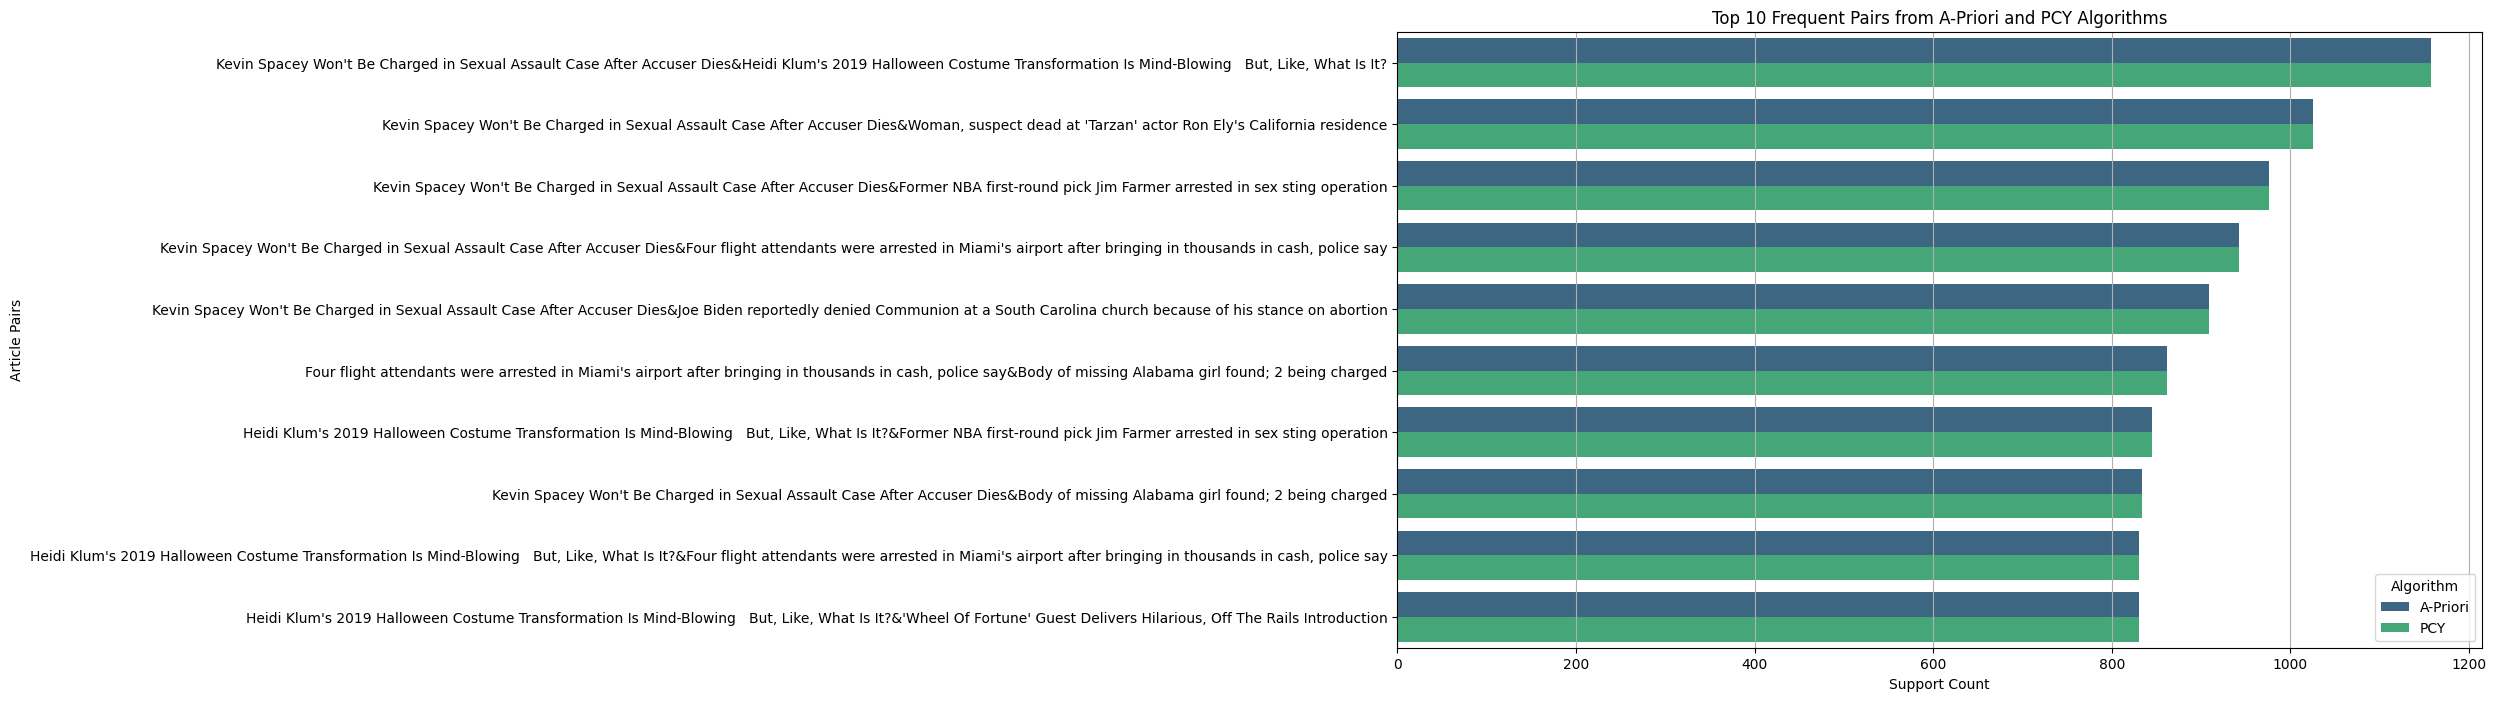

In [37]:
# Prepare data for plotting
apriori_pairs = []
apriori_counts = []
for pair, count in top_10_apriori:
    title = str(news_title_dict[pair[0]]) + "&" + str(news_title_dict[pair[1]])
    apriori_pairs.append(title)
    apriori_counts.append(count)

pcy_pairs = []
pcy_counts = []
for pair, count in top_10_pcy:
    title = str(news_title_dict[pair[0]]) + "&" + str(news_title_dict[pair[1]])
    pcy_pairs.append(title)
    pcy_counts.append(count)

# Df for easier vizualisation
plot_data = pd.DataFrame({
    'Pair': apriori_pairs + pcy_pairs,
    'Count': apriori_counts + pcy_counts,
    'Algorithm': ['A-Priori'] * 10 + ['PCY'] * 10})

plt.figure(figsize=(14, 8))
sns.barplot(data=plot_data, x='Count', y='Pair', hue='Algorithm', palette='viridis')

plt.title('Top 10 Frequent Pairs from A-Priori and PCY Algorithms')
plt.xlabel('Support Count')
plt.ylabel('Article Pairs')
plt.legend(title='Algorithm')
plt.grid(axis='x')
plt.show()


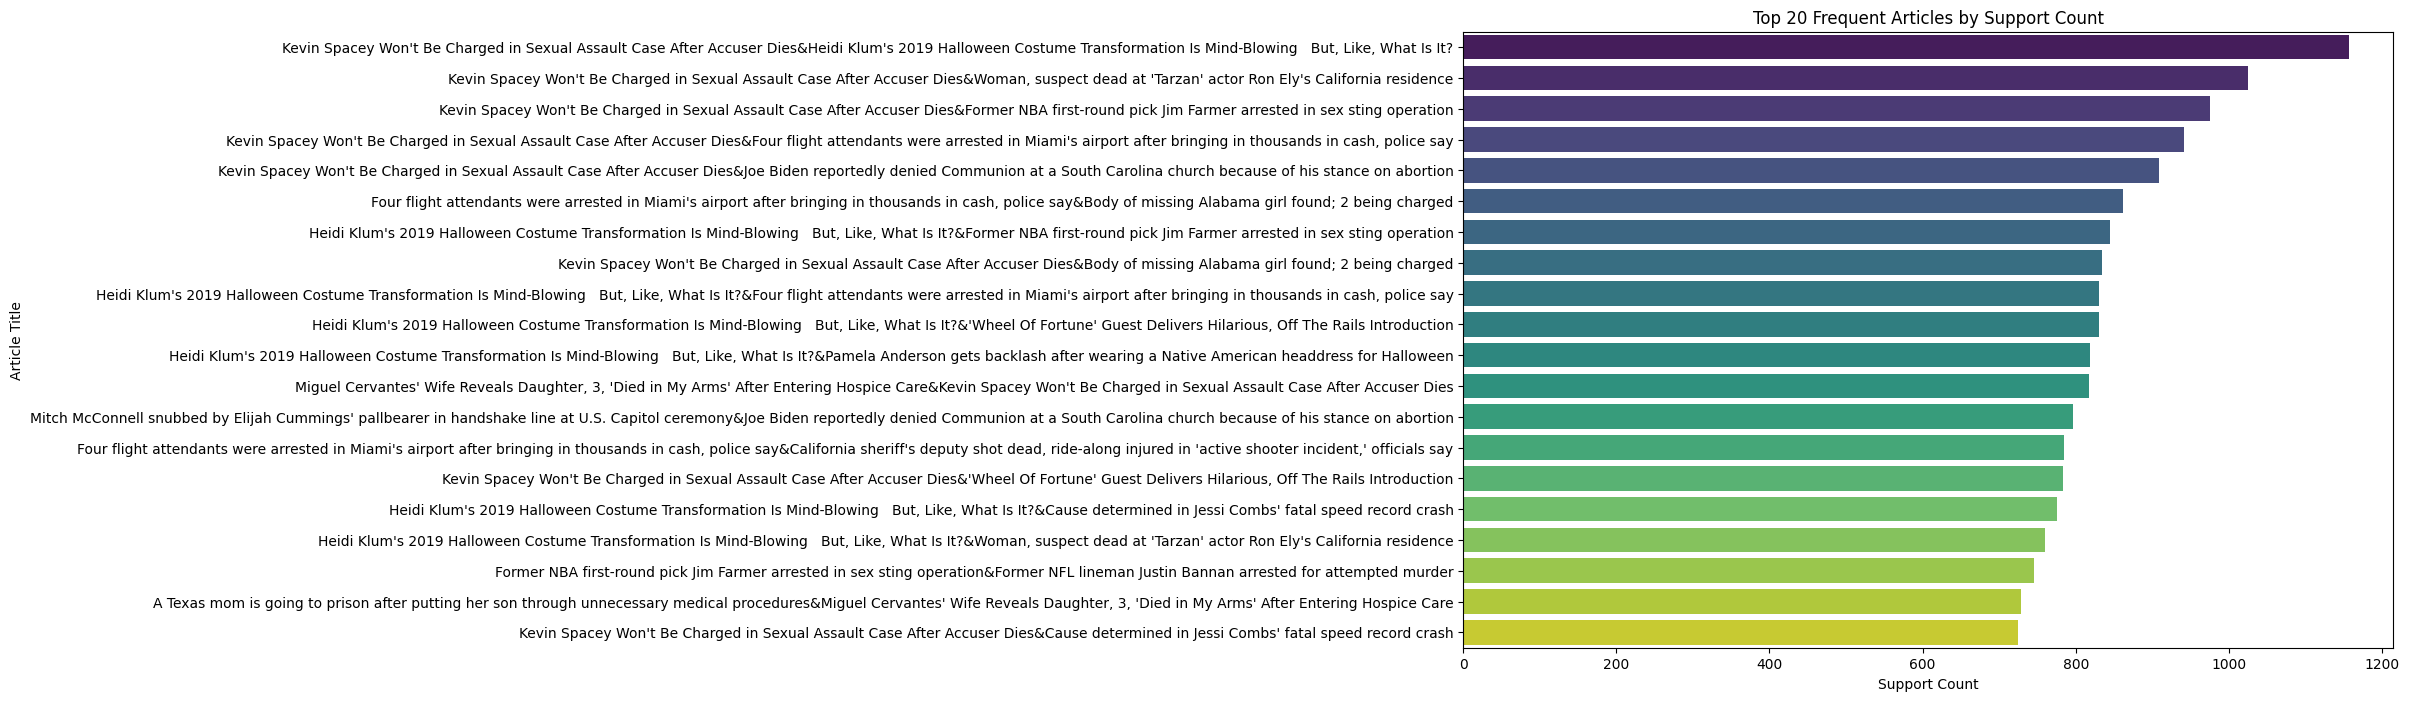

In [42]:
pairs_list_apriori = list(frequent_pairs_pcy.items())
sorted_pairs_apriori = sorted(pairs_list_apriori, key=lambda x: x[1], reverse=True)
top_10_apriori = sorted_pairs_apriori[:20]

pairs_list_pcy = list(frequent_pairs_pcy.items())
sorted_pairs_pcy = sorted(pairs_list_pcy, key=lambda x: x[1], reverse=True)
top_10_pcy = sorted_pairs_pcy[:20]

if top_10_apriori == top_10_pcy:

    apriori_pairs = []
    apriori_counts = []
    for pair, count in top_10_apriori:
        title = str(news_title_dict[pair[0]]) + "&" + str(news_title_dict[pair[1]])
        apriori_pairs.append(title)
        apriori_counts.append(count)

    plot_data = pd.DataFrame({
        'Title': apriori_pairs,
        'Count': apriori_counts})

    plt.figure(figsize=(12, 8))
    sns.barplot(data=plot_data, x='Count', y='Title', hue='Title', dodge=False, palette='viridis')
    plt.legend([], [], frameon=False)
    plt.title("Top 20 Frequent Articles by Support Count")
    plt.xlabel("Support Count")
    plt.ylabel("Article Title")
    plt.show()

else:
    "Different Top 20 for A-priori and PC-Y"

In [ ]:
all_data_apriori = {
    "All_articles": len(articles_all),
    "In_histories": len(articles_count),
    "Frequent_articles_apriori": len(frequent_articles_apriori),
    "Frequent_pairs_apriori": len(frequent_pairs_apriori),
    "Frequent_triplets_apriori": len(frequent_triplets)
}
all_data_apriori

{'All_articles': 42416,
 'In_histories': 37681,
 'Frequent_articles_apriori': 415,
 'Frequent_pairs_apriori': 93,
 'Frequent_triplets_apriori': 44}

In [44]:
all_data_pcy = {
    "All_articles": len(articles_all),
    "In_histories": len(articles_count),
    "Frequent_articles_pcy": len(frequent_items),
    "Frequent_pairs_pcy": len(frequent_pairs_pcy)
}
all_data_pcy

{'All_articles': 42416,
 'In_histories': 37681,
 'Frequent_articles_pcy': 415,
 'Frequent_pairs_pcy': 93}

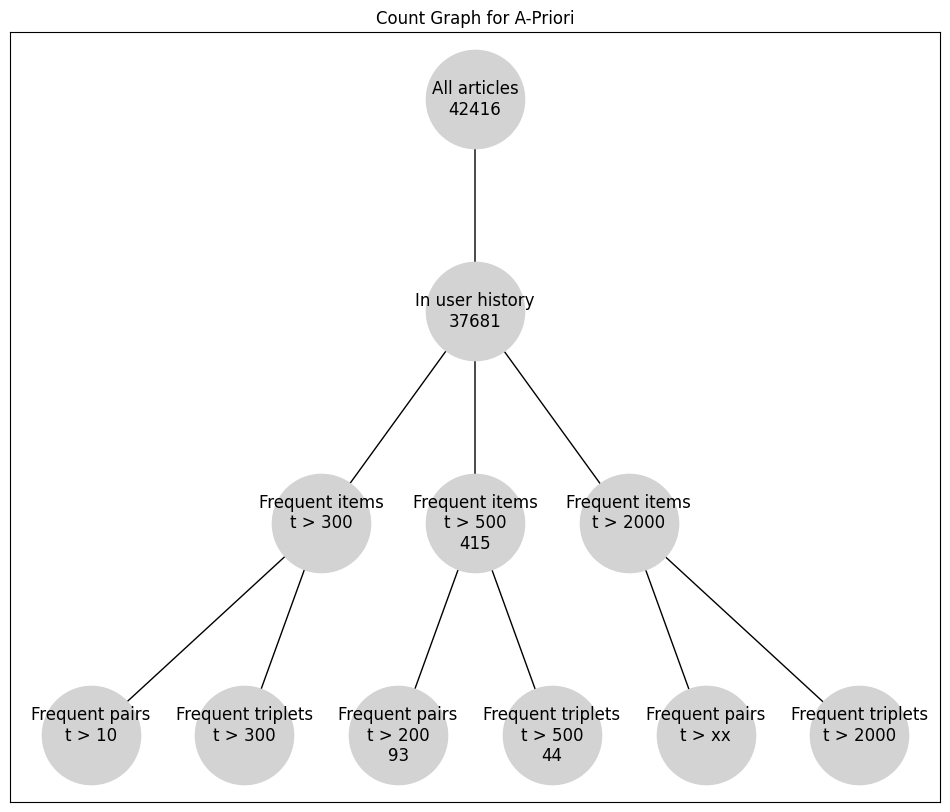

In [45]:
A = "All articles\n" + str(len(articles_all))
B = "In user history\n" + str(len(articles_count))
C = "Frequent items\nt > 2000\n" + str()
D = "Frequent triplets\nt > 2000\n" + str()
E = "Frequent pairs\nt > xx\n" + str()
F = "Frequent items\nt > 500\n" + str(len(frequent_articles_apriori))
H = "Frequent triplets\nt > 500\n" + str(len(frequent_triplets))
I = "Frequent pairs\nt > 200\n" + str(len(frequent_pairs_apriori))
J = "Frequent items\nt > 300\n" + str()
K = "Frequent triplets\nt > 300\n" + str()
L = "Frequent pairs\nt > 10\n" + str()

G = nx.DiGraph()
G.add_edges_from(
    [(A, B), 
     (B, C),
     (C, D),
     (C, E),
     (B, F),
     (F, H),
     (F, I),
     (B, J),
     (J, K),
     (J, L)
      ])

G.nodes[A]["subset"] = 0
G.nodes[B]["subset"] = 1
G.nodes[C]["subset"] = 2
G.nodes[D]["subset"] = 3
G.nodes[E]["subset"] = 3
G.nodes[F]["subset"] = 2
G.nodes[H]["subset"] = 3
G.nodes[I]["subset"] = 3
G.nodes[J]["subset"] = 2
G.nodes[K]["subset"] = 3
G.nodes[L]["subset"] = 3

pos = nx.multipartite_layout(G, subset_key="subset")

pos = {node: (y, -x) for node, (x, y) in pos.items()}

plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="lightgray")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True)

plt.title("Count Graph for A-Priori")
plt.show()

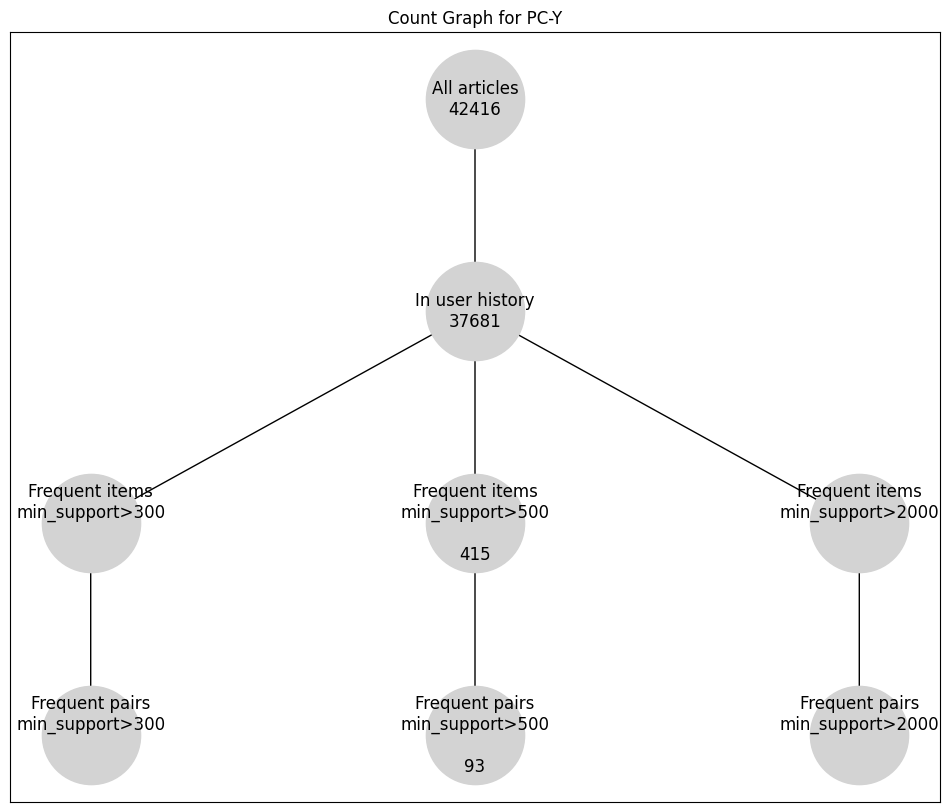

In [49]:
A = "All articles\n" + str(len(articles_all))
B = "In user history\n" + str(len(articles_count))
C = "Frequent items\nmin_support>2000\n\n" + str()
D = "Frequent pairs\nmin_support>2000\n\n" + str()
E = "Frequent items\nmin_support>500\n\n" + str(len(frequent_items))
F = "Frequent pairs\nmin_support>500\n\n" + str(len(frequent_pairs_pcy))
H = "Frequent items\nmin_support>300\n\n" + str()
I = "Frequent pairs\nmin_support>300\n\n" + str()

G = nx.DiGraph()
G.add_edges_from(
    [(A, B), 
     (B, C),
     (C, D),
     (B, E),
     (E, F),
     (B, H),
     (H, I)
      ])

G.nodes[A]["subset"] = 0
G.nodes[B]["subset"] = 1
G.nodes[C]["subset"] = 2
G.nodes[D]["subset"] = 3
G.nodes[E]["subset"] = 2
G.nodes[F]["subset"] = 3
G.nodes[H]["subset"] = 2
G.nodes[I]["subset"] = 3

pos = nx.multipartite_layout(G, subset_key="subset")

pos = {node: (y, -x) for node, (x, y) in pos.items()}

plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="lightgray")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True)

plt.title("Count Graph for PC-Y")
plt.show()